# Austin,Texas Airbnb Analysis

In [1]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read in the csv files
li=pd.read_csv('listings.csv')




In [3]:
#shape
print(li.shape)

(7889, 16)


In [26]:
li.sample(1)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
4778,34037955,¡¡Amazing Apartment!!,36468277,Maria,Loop,41.88528,-87.62562,Entire home/apt,125,7,5,0.5,1,362


In [5]:
#check for null values
li.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               7889
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1234
reviews_per_month                 1234
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [6]:
#clean my data drop the neighbourhood_group column and last review column. fill nan values on reviews per month with 0
#drop the neighbourhood_group column and last review column.
li.drop(['last_review'],axis=1,inplace=True)
li.drop(['neighbourhood_group'],axis=1,inplace=True)

#fill nan values on reviews_per_month with 0
li['reviews_per_month'].fillna(0,inplace = True)

##Explore the data


In [7]:
#unique neighborhood and room types
print(li['neighbourhood'].unique())
print(li['room_type'].unique())

['Hyde Park' 'South Lawndale' 'West Town' 'Lincoln Park' 'Logan Square'
 'Near North Side' 'Uptown' 'North Center' 'Lake View' 'Irving Park'
 'Portage Park' 'Pullman' 'Near South Side' 'West Ridge' 'Near West Side'
 'Chatham' 'Edgewater' 'Bridgeport' 'Woodlawn' 'Albany Park' 'Kenwood'
 'Douglas' 'Rogers Park' 'Lincoln Square' 'Grand Boulevard' 'Forest Glen'
 'Loop' 'Lower West Side' 'Humboldt Park' 'East Garfield Park'
 'North Lawndale' 'Oakland' 'Beverly' 'Mckinley Park' 'Avondale'
 'Norwood Park' 'Washington Park' 'Morgan Park' 'Dunning' 'South Shore'
 'Armour Square' 'South Deering' 'Auburn Gresham' 'West Garfield Park'
 'Hermosa' 'Hegewisch' 'South Chicago' 'North Park' 'Jefferson Park'
 'West Elsdon' 'Austin' 'Ashburn' 'Belmont Cragin'
 'Greater Grand Crossing' 'Garfield Ridge' 'Brighton Park'
 'Archer Heights' 'Edison Park' 'West Lawn' 'New City' 'Englewood'
 'Avalon Park' 'Gage Park' 'Montclare' 'Roseland' 'Clearing'
 'Calumet Heights' 'Washington Heights' 'Fuller Park' 'West Pu

In [8]:
#mm=li['neighbourhood'].value_counts()

## EDA

In [9]:
#additional imports
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

import plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *

In [10]:
chi_mean =li.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head()
#chi_mean


#make the plot
neighbourhoods= ['#7e4534', '#673535', '#d4c7bc', '#543936', '#784a42']
mydata = go.Bar(x= chi_mean.index,
                y= chi_mean.values,
                marker=dict(color=neighbourhoods))
# now the layout
mylayout=go.Layout(title="Top Five Neighborhoods in Chicago Price Means",
                   xaxis= dict(title='neighbourhood'),
                   yaxis=dict(title='price'))
# bind using go.Figure
myfig = go.Figure(data=[mydata], layout=mylayout)
myfig.show()

In [11]:
chi_review =li.groupby('neighbourhood')['reviews_per_month'].mean().sort_values(ascending=False).head()
#chi_mean


#make the plot
neighbourhoods= ['#7e4534', '#673535', '#d4c7bc', '#543936', '#784a42']
mydata = go.Bar(x= chi_review.index,
                y= chi_review.values,
                marker=dict(color=neighbourhoods))
# now the layout
mylayout=go.Layout(title="Top Five Neighborhoods in Chicago Average Reviews per month",
                   xaxis= dict(title='neighbourhood'),
                   yaxis=dict(title='Review'))
# bind using go.Figure
myfig = go.Figure(data=[mydata], layout=mylayout)
myfig.show()


#questions to answer
what is the minimum nights that guests stayed in the different rooms
what was the price per room type
scatter plot of nights and price
host how many listings do they have


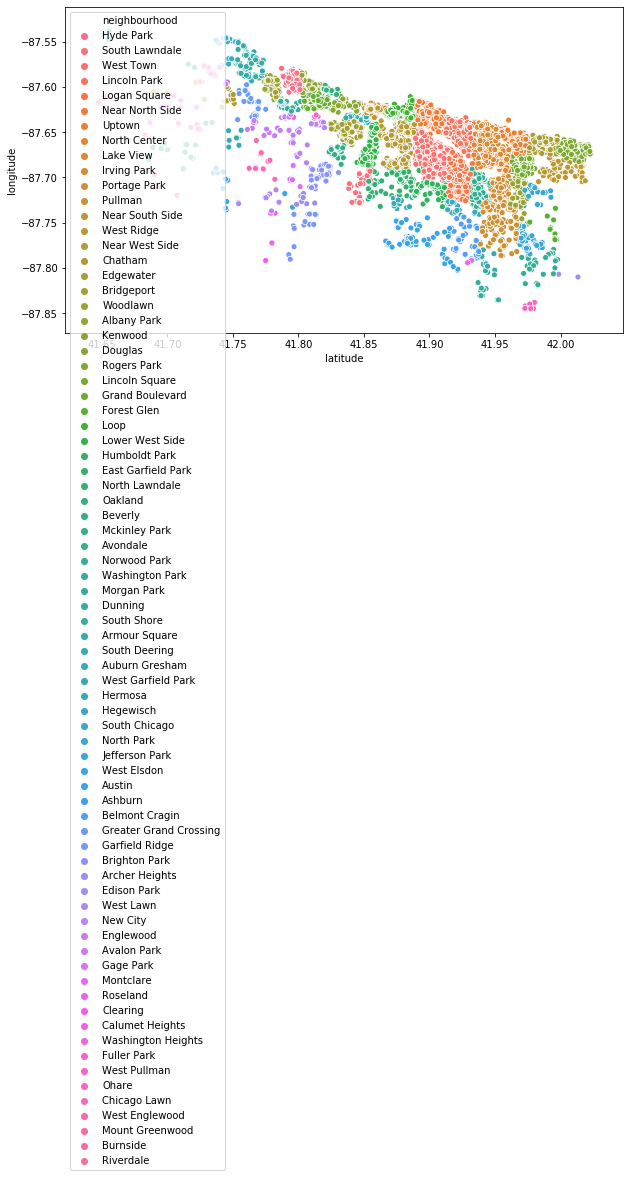

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(li.latitude,li.longitude,hue=li.neighbourhood)
plt.ioff()

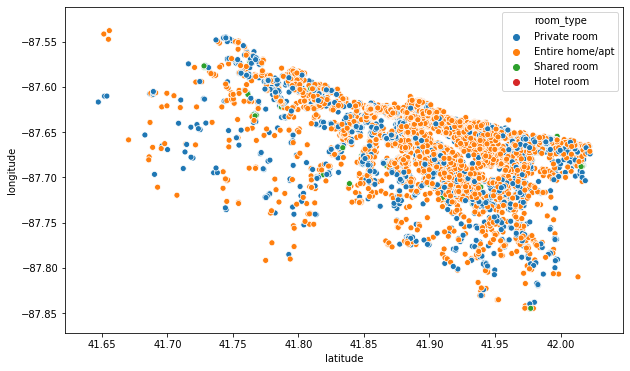

In [38]:
plt.figure(figsize=(10,6))
sns.scatterplot(li.latitude,li.longitude,hue=li.room_type)
plt.ioff()

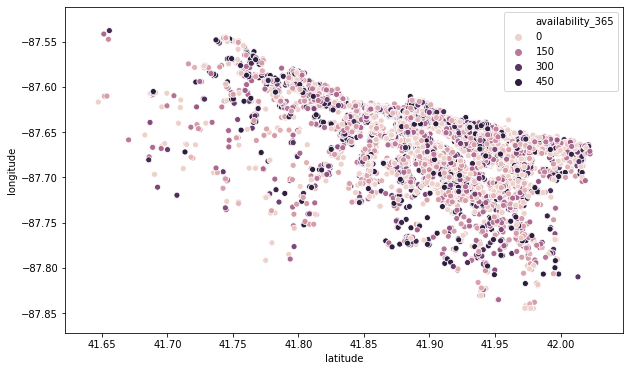

In [39]:
plt.figure(figsize=(10,6))
sns.scatterplot(li.latitude,li.longitude,hue=li.availability_365)
plt.ioff()

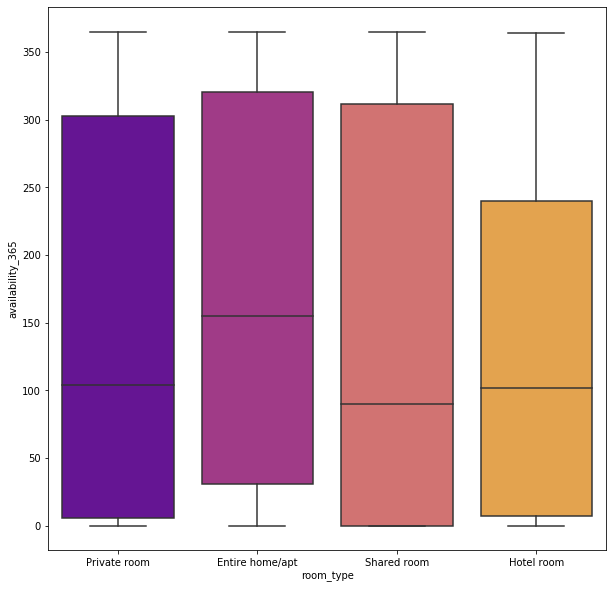

In [15]:

#relationship between neighbourhood and availability of room

plt.figure(figsize=(10,10))
ax = sns.boxplot(data=li, x='room_type',y='availability_365',palette='plasma')

In [16]:

#scatterplot of Latitude and Longitude
fig = go.Figure(data = go.Scattergeo(locationmode = 'USA-states',
                                    lon = li['longitude'],
                                    lat = li['latitude'],
                                    mode = 'markers',
                                    marker = dict(
                                                size = 8,
                                                opacity = 0.8,
                                                reversescale = True,
                                                autocolorscale = False,
                                                symbol = 'square',
                                                line = dict(
                                                    width=1,
                                                    color='rgba(102, 102, 102)'
                                                ),
                                                colorscale = 'Blues',
                                                cmin = 0,
                                                color = li['price'],
                                                cmax = li['price'].max(),
                                                colorbar_title="Price of the listings in Chicago"
                                            )))

fig.show()

<Figure size 720x432 with 0 Axes>

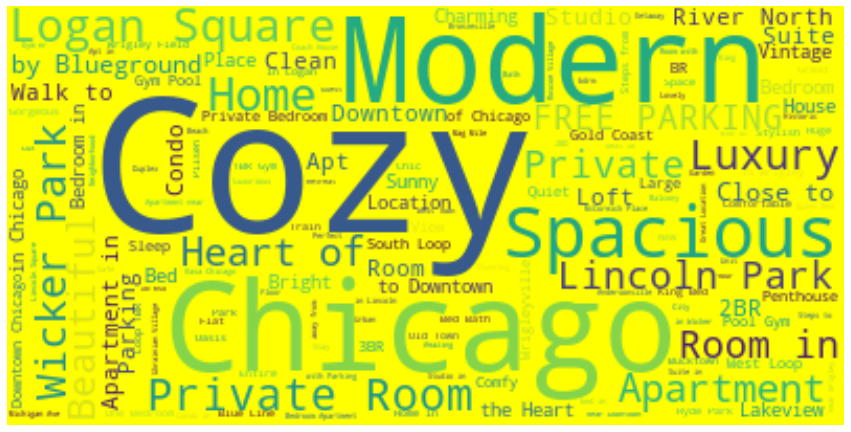

In [19]:
! pip install wordcloud
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in li.name)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="yellow").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("imagecolorgenerator.png")

In [21]:
#number of hosts
li['host_name'].value_counts()

Blueground              220
Sonder                   98
John                     84
Natalia                  81
Rob                      81
Joe                      76
Michael                  74
David                    68
Corp Condos & Apts       62
Kasa                     61
Zencity                  61
Nicole                   60
Alex                     48
Matt                     47
Marina                   45
Dan                      45
Loftium                  45
Helen                    43
Andrew                   39
Ryan                     36
Rent Local               35
K                        34
Kari                     31
Tbfs                     31
Jason                    31
Emily & Rich             30
Mark                     30
Maximillian              30
ExecuSuite Inc.          28
Tom                      28
                       ... 
Leticia                   1
Tova                      1
Theodor                   1
Viki                      1
Jay & Elisa         

In [37]:
host_mean =li.groupby('host_name')['calculated_host_listings_count'].sum().sort_values(ascending=False).head()
host_mean

host=[['Blueground',48400],['Sonder',9604],['Natalia',6401],['Rob',5781],['Corp Condos & Apts',3844]]

df = pd.DataFrame(host, columns = ['Host', 'Total Listings']) 
df
  

  

,Host,Total Listings
0,Blueground,48400
1,Sonder,9604
2,Natalia,6401
3,Rob,5781
4,Corp Condos & Apts,3844
